# **Diabetes Risk Prediction**
### Gul e Zara
### Rumesha Naveed
### Maria Shahab

# Loading our Dataset

In [ ]:
import pandas as pd

file_path = "/content/diabetes_prediction_dataset.csv (1).zip"   # Adjust filename/path as needed
df = pd.read_csv(file_path)

# Dataset Info

In [ ]:
print("Shape of the dataset:", df.shape)
print("\nColumns:")
display(df.columns.tolist())
print("\nData types:")
display(df.dtypes)
print("\nFirst 5 rows:")
display(df.head())

Shape of the dataset: (100000, 9)

Columns:


['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']


Data types:


,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64



First 5 rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Cleaning

In [ ]:
# Removing duplicates
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)

# Checking for missing values
missing = df.isnull().sum()
print("\nMissing values per column:")
display(missing)

if missing.sum() == 0:
    print("\nNo missing values found! Skipping imputation.")
else:
    print("\nMissing values detected — handling them now...")

    for col in df.columns:
      # If the column is text (object), fill with the most common value (mode)
      if df[col].dtype == 'object':
          df[col] = df[col].fillna(df[col].mode()[0])
      # If the column is a number, fill with the median
      else:
        df[col] = df[col].fillna(df[col].median())

df['gender'] = df['gender'].astype('category')
df['smoking_history'] = df['smoking_history'].astype('category')

# Final check after cleaning
print("\nAfter cleaning:")
print("\nShape:", df.shape)
print("\nData types:")
display(df.dtypes)
print("\nMissing values per column:\n")
display(df.isnull().sum())

# Saving cleaned dataset to a new csv file
df.reset_index(drop=True, inplace=True)
df.to_csv("diabetes_cleaned.csv", index=False)
print("Cleaned dataset saved successfully as 'diabetes_cleaned.csv'")



Number of duplicate rows: 3854
Duplicates removed. New shape: (96146, 9)

Missing values per column:


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0



No missing values found! Skipping imputation.

After cleaning:

Shape: (96146, 9)

Data types:


,0
gender,category
age,float64
hypertension,int64
heart_disease,int64
smoking_history,category
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64



Missing values per column:



,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Cleaned dataset saved successfully as 'diabetes_cleaned.csv'


# Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Summary Statistics

In [ ]:
# Define variable types
categorical_variables = ["gender", "hypertension", "heart_disease", "smoking_history", "diabetes"]
numerical_variables = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

# Summary Statistics
print("Summary Statistics for Numerical Variables:\n")
display(df[numerical_variables].describe().T)

print("\nSummary Statistics for Categorical Variables:\n")
display(df[categorical_variables].describe().T)

Summary Statistics for Numerical Variables:



,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00



Summary Statistics for Categorical Variables:



,count,mean,std,min,25%,50%,75%,max
hypertension,96146.0,0.077601,0.267544,0.0,0.0,0.0,0.0,1.0
heart_disease,96146.0,0.040803,0.197833,0.0,0.0,0.0,0.0,1.0
diabetes,96146.0,0.088220,0.283616,0.0,0.0,0.0,0.0,1.0


# Categorical Variables

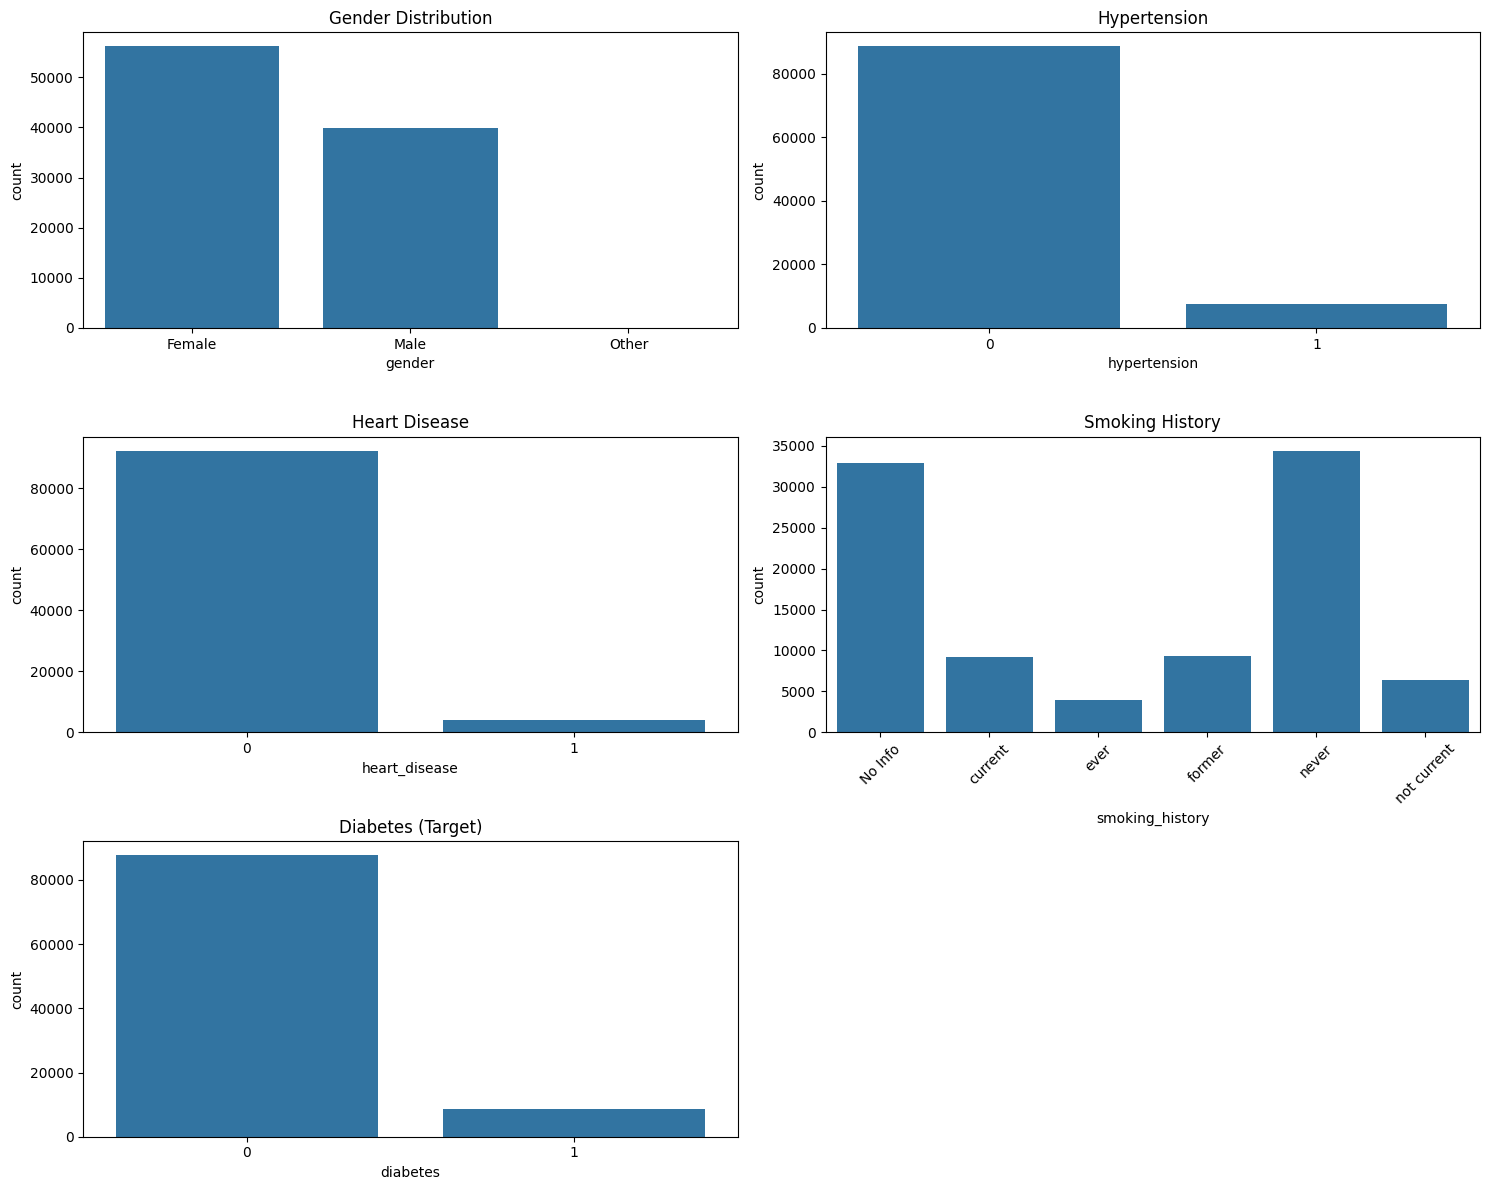

In [ ]:
# Setting up the big figure
plt.figure(figsize=(15, 12))

# 1. Gender
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, position 1
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

# 2. Hypertension
plt.subplot(3, 2, 2)  # Position 2
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension')

# 3. Heart Disease
plt.subplot(3, 2, 3)
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease')

# 4. Smoking History
plt.subplot(3, 2, 4)
sns.countplot(x='smoking_history', data=df)
plt.xticks(rotation=45) # Rotated text so it fits
plt.title('Smoking History')

# 5. Diabetes (Target)
plt.subplot(3, 2, 5)
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes (Target)')

plt.tight_layout()
plt.show()

# Numerical Variables

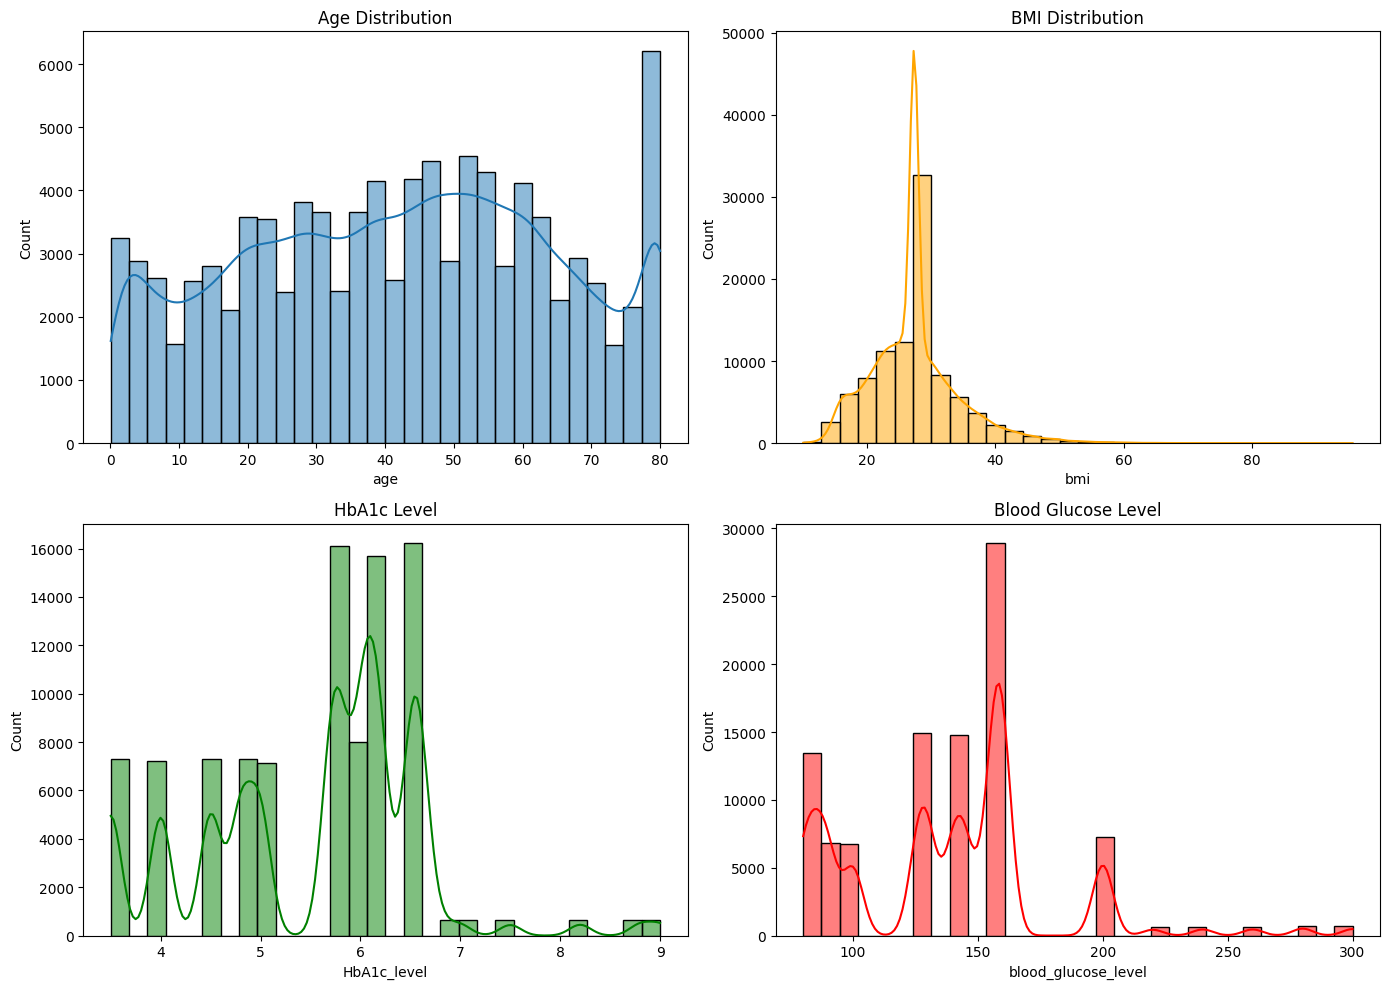

In [ ]:
# Histograms for numerical columns
plt.figure(figsize=(14, 10))

# 1. Age
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')

# 2. BMI
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], bins=30, kde=True, color='orange')
plt.title('BMI Distribution')

# 3. HbA1c Level
plt.subplot(2, 2, 3)
sns.histplot(df['HbA1c_level'], bins=30, kde=True, color='green')
plt.title('HbA1c Level')

# 4. Blood Glucose
plt.subplot(2, 2, 4)
sns.histplot(df['blood_glucose_level'], bins=30, kde=True, color='red')
plt.title('Blood Glucose Level')

plt.tight_layout()
plt.show()

# Box Plots

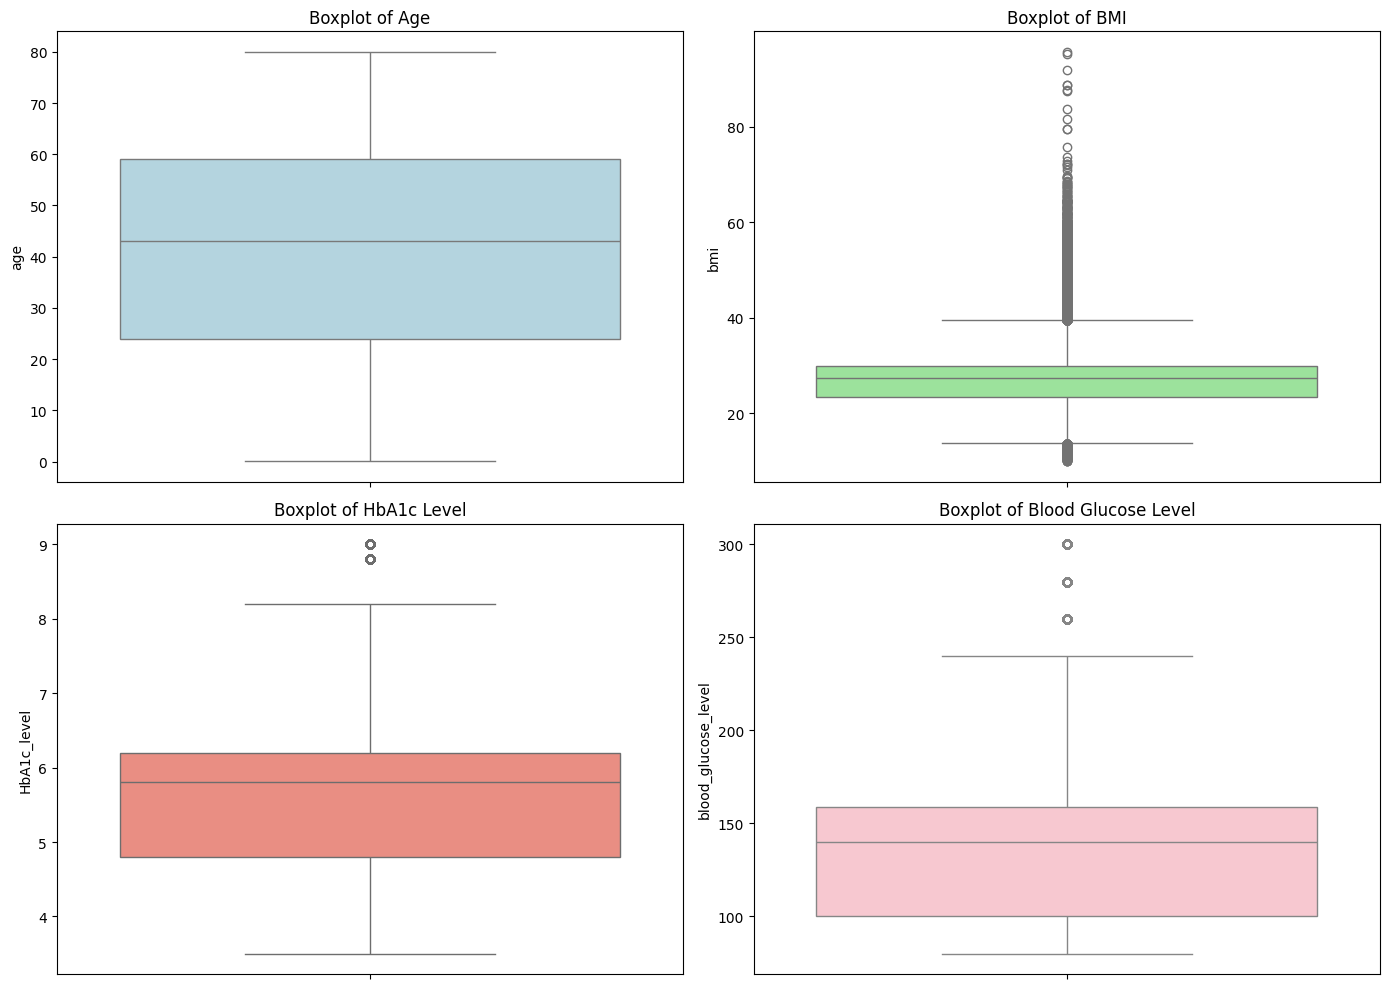

In [ ]:
# Checking for outliers using Boxplots
plt.figure(figsize=(14, 10))

# 1. Age
plt.subplot(2, 2, 1)
sns.boxplot(y=df['age'], color='lightblue')
plt.title('Boxplot of Age')

# 2. BMI
plt.subplot(2, 2, 2)
sns.boxplot(y=df['bmi'], color='lightgreen')
plt.title('Boxplot of BMI')

# 3. HbA1c Level
plt.subplot(2, 2, 3)
sns.boxplot(y=df['HbA1c_level'], color='salmon')
plt.title('Boxplot of HbA1c Level')

# 4. Blood Glucose
plt.subplot(2, 2, 4)
sns.boxplot(y=df['blood_glucose_level'], color='pink')
plt.title('Boxplot of Blood Glucose Level')

plt.tight_layout()
plt.show()

# Scatter Plots

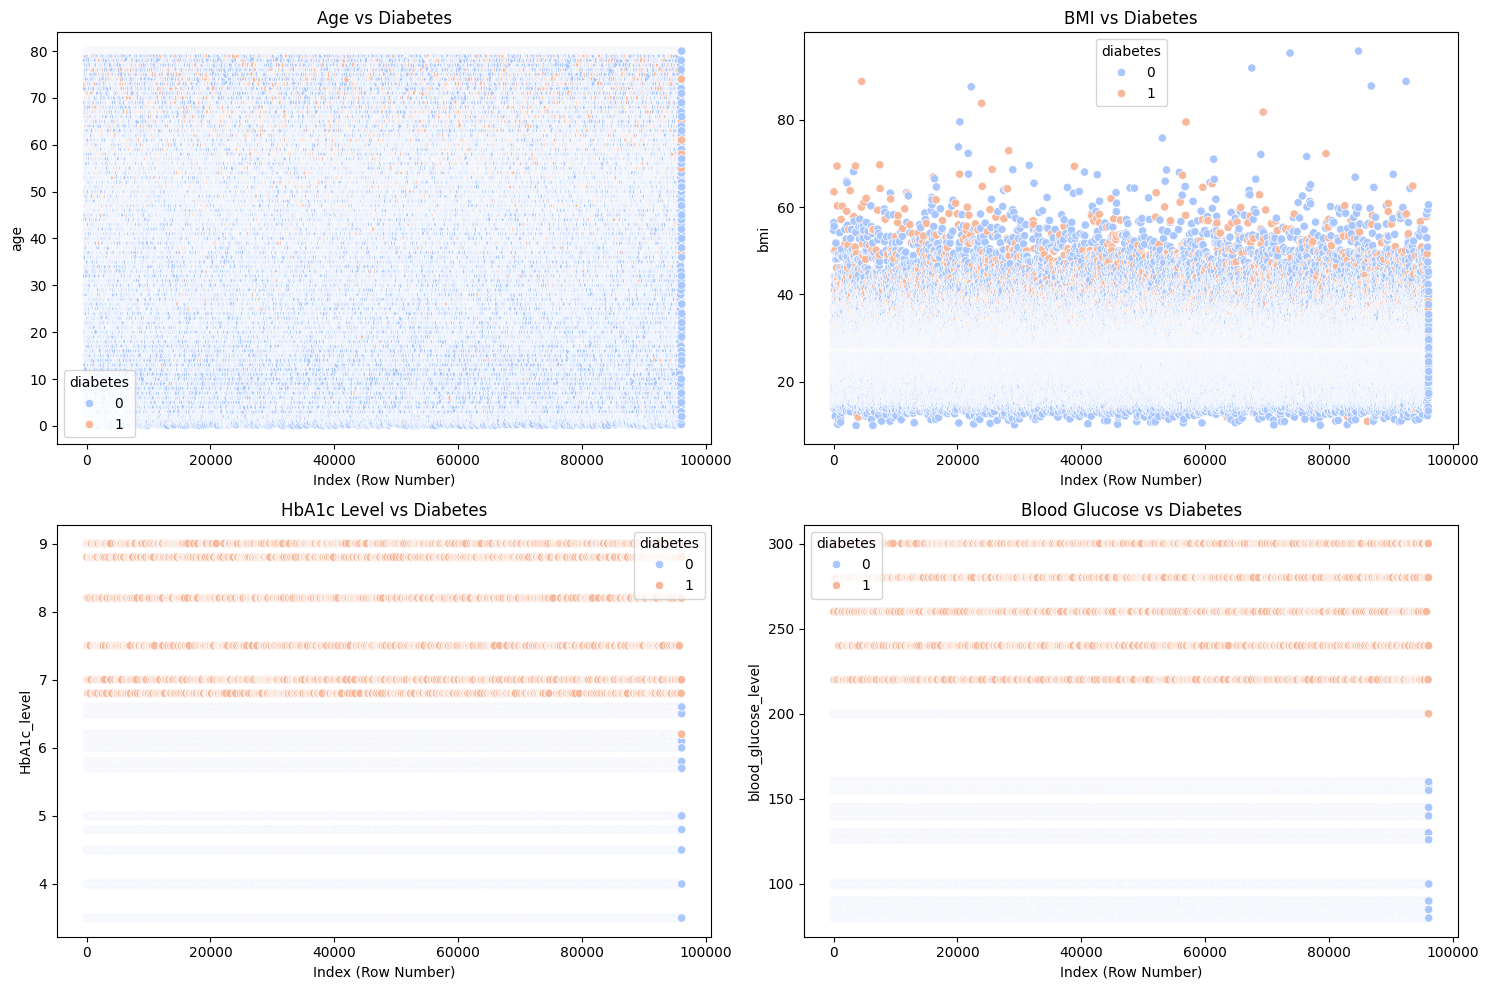

In [ ]:
# Scatterplots to see how the numbers relate to Diabetes
plt.figure(figsize=(15, 10))

# 1. Age vs Diabetes
plt.subplot(2, 2, 1)
sns.scatterplot(x=df.index, y='age', data=df, hue='diabetes', palette='coolwarm')
plt.title('Age vs Diabetes')
plt.xlabel('Index (Row Number)')

# 2. BMI vs Diabetes
plt.subplot(2, 2, 2)
sns.scatterplot(x=df.index, y='bmi', data=df, hue='diabetes', palette='coolwarm')
plt.title('BMI vs Diabetes')
plt.xlabel('Index (Row Number)')

# 3. HbA1c Level vs Diabetes
plt.subplot(2, 2, 3)
sns.scatterplot(x=df.index, y='HbA1c_level', data=df, hue='diabetes', palette='coolwarm')
plt.title('HbA1c Level vs Diabetes')
plt.xlabel('Index (Row Number)')

# 4. Blood Glucose vs Diabetes
plt.subplot(2, 2, 4)
sns.scatterplot(x=df.index, y='blood_glucose_level', data=df, hue='diabetes', palette='coolwarm')
plt.title('Blood Glucose vs Diabetes')
plt.xlabel('Index (Row Number)')

plt.tight_layout()
plt.show()

# Correlation HeatMap

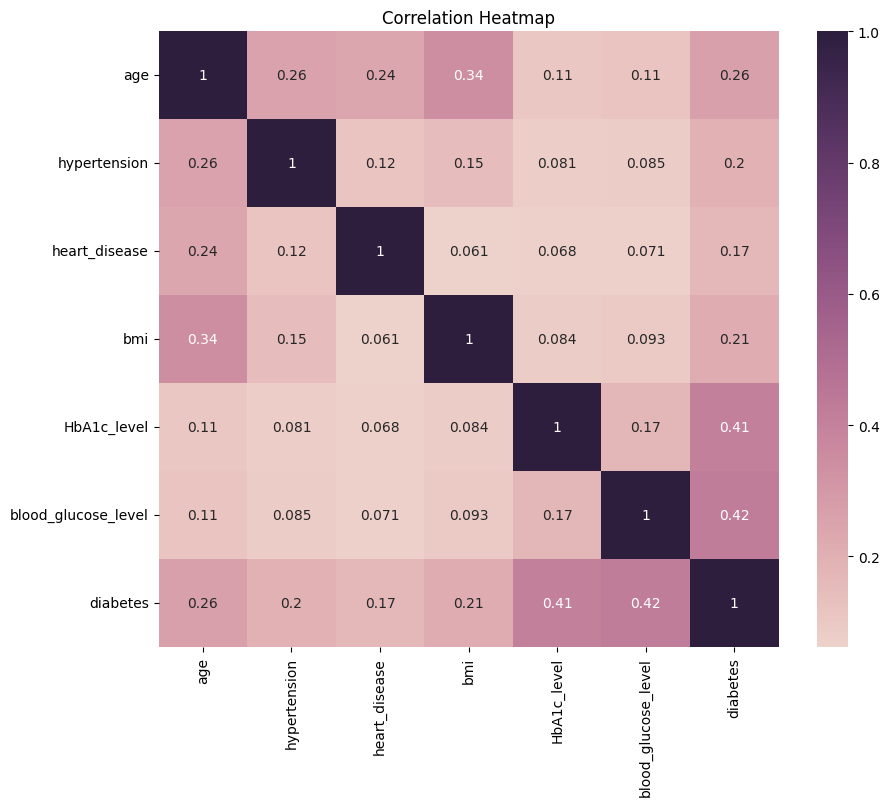

In [ ]:
# Checking correlation (how variables relate to each other)
plt.figure(figsize=(10, 8))

# Calculate correlation only for numbers
correlation = df.corr(numeric_only=True)

# Plot the heatmap
cubehelix_cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(correlation, annot=True, cmap=cubehelix_cmap)
plt.title('Correlation Heatmap')
plt.show()

# Pair Plots using SeaBorn

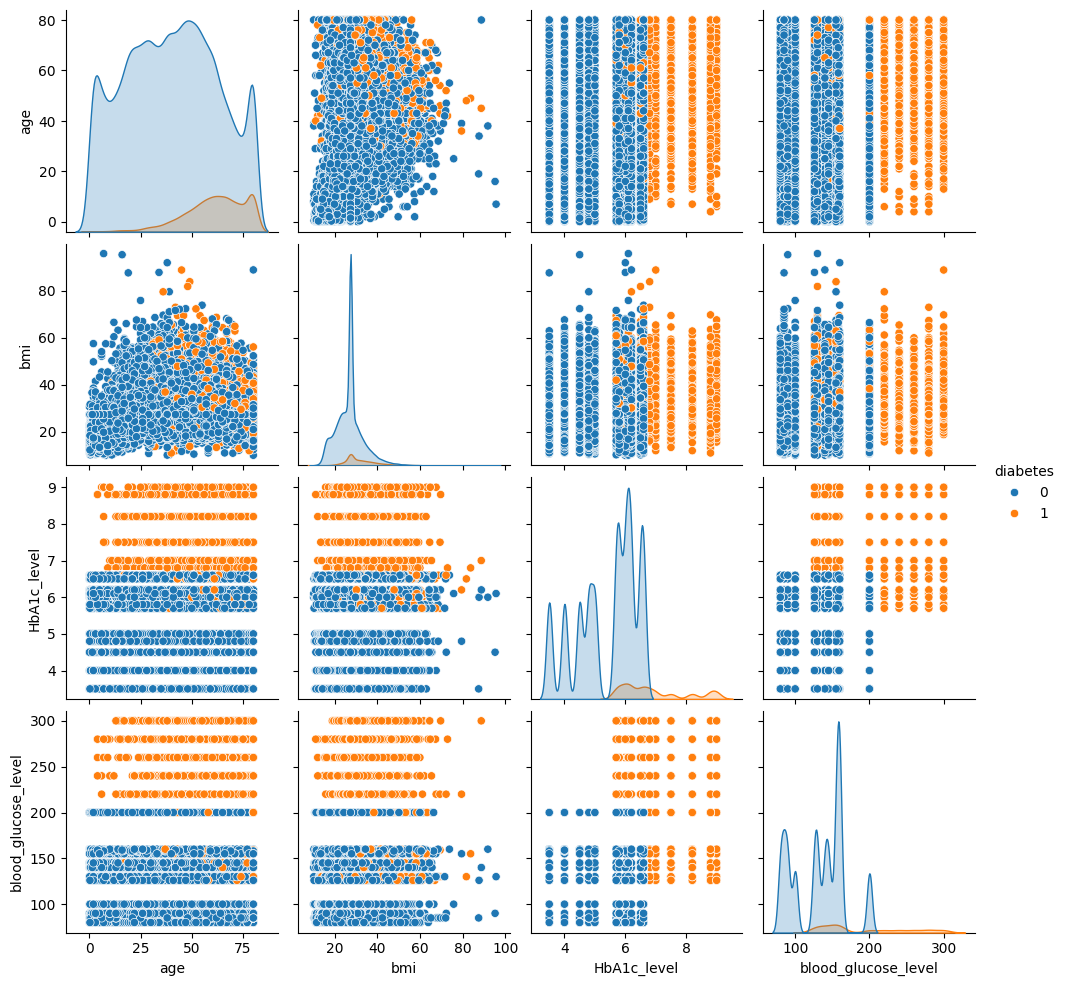

In [ ]:
# 7. Pairwise Relationships of Features by Diabetes Status
cols_to_plot = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

sns.pairplot(df[cols_to_plot], hue='diabetes')
plt.show()

# Feature Engineering

In [ ]:
# I created functions to group Glucose and HbA1c based on
# standard diabetes medical thresholds found online.

def categorize_glucose(glucose):
    if glucose > 200:
        return 'Diabetes_Level'
    elif glucose > 140:
        return 'High_Risk'
    else:
        return 'Normal'

def categorize_hba1c(hba1c):
    if hba1c > 6.5:
        return 'Diabetes_Level'
    elif hba1c > 5.7:
        return 'High_Risk'
    else:
        return 'Normal'

# Applying the functions
df['glucose_group'] = df['blood_glucose_level'].apply(categorize_glucose)
df['hba1c_group'] = df['HbA1c_level'].apply(categorize_hba1c)


# The original columns had too many confusing categories like "ever", "not current".
# I grouped them into 3 clear risk levels.

def simplify_smoking(status):
    if status in ['never', 'No Info']:
        return 'Low_Risk'
    elif status == 'current':
        return 'High_Risk'
    else:
        return 'Moderate_Risk' # Covers 'former', 'ever', 'not current'

df['smoking_risk'] = df['smoking_history'].apply(simplify_smoking)

# Drop the original 'smoking_history' column, as it's been replaced by 'smoking_risk'
df = df.drop('smoking_history', axis=1)


# Combining diseases to see overall health risk.
# If a person has both Hypertension AND Heart Disease, their score is 2.
df['health_risk_score'] = df['hypertension'] + df['heart_disease']

# Flagging High-Risk Seniors (Age > 60 with Heart Issues)
df['senior_high_risk'] = ((df['age'] >= 60) & (df['heart_disease'] == 1)).astype(int)



categorical_cols = ['gender', 'smoking_risk', 'glucose_group', 'hba1c_group']

# drop_first=True avoids redundancy (e.g., we don't need both Male and Female columns)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nEncoding complete. New columns added.")

from sklearn.preprocessing import StandardScaler

# List of columns that are actually continuous numbers
cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'health_risk_score']

scaler = StandardScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

print("Scaling complete. Only continuous variables were scaled.")

print("\nFinal Dataset Shape:", df_encoded.shape)
print("First 5 rows of prepared data:")
display(df_encoded.head())

# Define X (features) and y (target) for the models
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']



Encoding complete. New columns added.
Scaling complete. Only continuous variables were scaled.

Final Dataset Shape: (96146, 17)
First 5 rows of prepared data:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,health_risk_score,senior_high_risk,gender_Male,gender_Other,smoking_risk_Low_Risk,smoking_risk_Moderate_Risk,glucose_group_High_Risk,glucose_group_Normal,hba1c_group_High_Risk,hba1c_group_Normal
0,1.700840,0,1,-0.314947,0.994563,0.043554,0,2.509468,1,False,False,True,False,False,True,False,False
1,0.543372,0,0,-0.000216,0.994563,-1.423096,0,-0.337035,0,False,False,True,False,False,True,False,False
2,-0.614096,0,0,-0.000216,0.155970,0.483549,0,-0.337035,0,True,False,True,False,True,False,False,True
3,-0.257952,0,0,-0.572051,-0.496269,0.410216,0,-0.337035,0,False,False,False,False,True,False,False,True
4,1.522768,1,1,-1.061141,-0.682623,0.410216,0,5.355971,1,True,False,False,False,True,False,False,True


# Splitting the data (80-20 split)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split successfully.")
print(f"Training Data: {X_train.shape}")
print(f"Testing Data:  {X_test.shape}")

Data split successfully.
Training Data: (76916, 16)
Testing Data:  (19230, 16)


# Logistic Regression using Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score

# Train a logistic regression model using sklearn
model = LogisticRegression(class_weight='balanced', random_state=42)

print("Training logistic regression...")
model.fit(X_train, y_train)

# Predict on test data
test_predictions = model.predict(X_test)

print("\n--- Logistic Regression Results ---")

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_test, test_predictions, zero_division=0)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, test_predictions, zero_division=0)
print(f"Recall: {recall:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
matrix = confusion_matrix(y_test, test_predictions)
print(matrix)
print("(Rows = Actual labels, Columns = Predicted labels)")

#ROC-AUC score
probabilities = model.predict_proba(X_test)
positive_class_probs = probabilities[:, 1]
roc_auc = roc_auc_score(y_test, positive_class_probs)
print("ROC-AUC Score:", round(roc_auc, 4))

Training logistic regression...

--- Logistic Regression Results ---
Accuracy: 89.13%
Precision: 0.44
Recall: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     17534
           1       0.44      0.87      0.59      1696

    accuracy                           0.89     19230
   macro avg       0.71      0.88      0.76     19230
weighted avg       0.94      0.89      0.91     19230


Confusion Matrix:
[[15660  1874]
 [  216  1480]]
(Rows = Actual labels, Columns = Predicted labels)
ROC-AUC Score: 0.9622


**Save Logistic Regression Model**

In [ ]:
import pickle

with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)


# Random Forest using Scikit-Learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)

print("Training Random Forest...")
rf_model.fit(X_train, y_train)

# Predict on test data
rf_predictions = rf_model.predict(X_test)

print("\n--- Random Forest Results ---")

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

# Precision
rf_precision = precision_score(y_test, rf_predictions, zero_division=0)
print(f"Precision: {rf_precision:.2f}")

# Recall
rf_recall = recall_score(y_test, rf_predictions, zero_division=0)
print(f"Recall: {rf_recall:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
rf_matrix = confusion_matrix(y_test, rf_predictions)
print(rf_matrix)
print("(Rows = Actual labels, Columns = Predicted labels)")

# ROC-AUC score
rf_probabilities = rf_model.predict_proba(X_test)
rf_positive_probs = rf_probabilities[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_positive_probs)
print("ROC-AUC Score:", round(rf_roc_auc, 4))

Training Random Forest...

--- Random Forest Results ---
Accuracy: 90.83%
Precision: 0.49
Recall: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     17534
           1       0.49      0.89      0.63      1696

    accuracy                           0.91     19230
   macro avg       0.74      0.90      0.79     19230
weighted avg       0.94      0.91      0.92     19230


Confusion Matrix:
[[15963  1571]
 [  193  1503]]
(Rows = Actual labels, Columns = Predicted labels)
ROC-AUC Score: 0.9746


# Saving Random Forest Model

In [ ]:
import pickle

with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

# XG Boost using xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score

# Calculate scale_pos_weight for XGBoost
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_weight = neg_count / pos_count

# Train an XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=scale_weight,
    random_state=42,
    eval_metric='logloss'
)

print(f"Training XGBoost (scale_pos_weight={scale_weight:.2f})...")
xgb_model.fit(X_train, y_train)

# Predict on test data
xgb_predictions = xgb_model.predict(X_test)

print("\n--- XGBoost Results ---")

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"Accuracy: {xgb_accuracy * 100:.2f}%")

# Precision
xgb_precision = precision_score(y_test, xgb_predictions, zero_division=0)
print(f"Precision: {xgb_precision:.2f}")

# Recall
xgb_recall = recall_score(y_test, xgb_predictions, zero_division=0)
print(f"Recall: {xgb_recall:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, xgb_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
xgb_matrix = confusion_matrix(y_test, xgb_predictions)
print(xgb_matrix)
print("(Rows = Actual labels, Columns = Predicted labels)")

# ROC-AUC score
xgb_probabilities = xgb_model.predict_proba(X_test)
xgb_positive_probs = xgb_probabilities[:, 1]
xgb_roc_auc = roc_auc_score(y_test, xgb_positive_probs)
print("ROC-AUC Score:", round(xgb_roc_auc, 4))

Training XGBoost (scale_pos_weight=10.33)...

--- XGBoost Results ---
Accuracy: 89.51%
Precision: 0.45
Recall: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     17534
           1       0.45      0.93      0.61      1696

    accuracy                           0.90     19230
   macro avg       0.72      0.91      0.77     19230
weighted avg       0.94      0.90      0.91     19230


Confusion Matrix:
[[15644  1890]
 [  127  1569]]
(Rows = Actual labels, Columns = Predicted labels)
ROC-AUC Score: 0.9775


# Saving XG Boost Model


In [ ]:
import pickle

with open("xg_boost_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

# ROC-AUC Curve

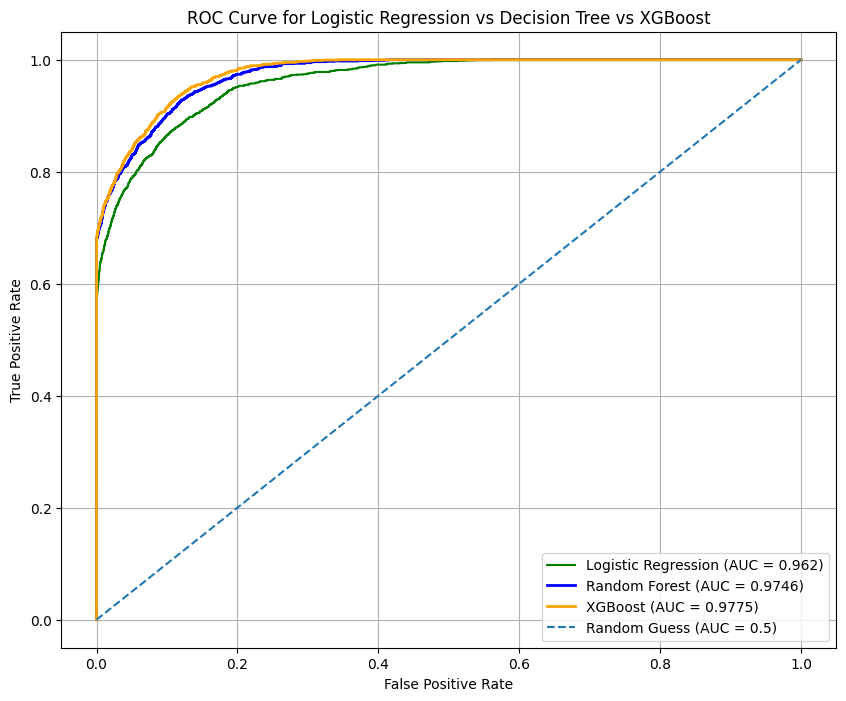

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# get positive-class probabilities
logistic_probabilities = model.predict_proba(X_test)[:, 1]
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
xgb_probabilities = xgb_model.predict_proba(X_test)[:, 1]

# calculate ROC points
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probabilities)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities)

# calculate AUC score
logistic_auc = roc_auc_score(y_test, logistic_probabilities)
rf_auc = roc_auc_score(y_test, rf_probabilities)
xgb_auc = roc_auc_score(y_test, xgb_probabilities)

#Setting up figure size
plt.figure(figsize=(10, 8))

#Plotting all 3 curves
plt.plot(logistic_fpr, logistic_tpr, color='green',
         label=f"Logistic Regression (AUC = {logistic_auc:.3f})")

plt.plot(rf_fpr, rf_tpr, color='blue', lw=2,
         label=f"Random Forest (AUC = {rf_auc:.4f})")

plt.plot(xgb_fpr, xgb_tpr, color='orange', lw=2,
         label=f"XGBoost (AUC = {xgb_auc:.4f})")

# Add diagonal reference line
plt.plot([0, 1], [0, 1], "--", label="Random Guess (AUC = 0.5)")

# Graph labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression vs Decision Tree vs XGBoost")

plt.legend()
plt.grid(True)
plt.show()


# Model Performance Analysis and Comparison

## Model Comparison Table

| Criteria | Logistic Regression | Random Forest | XGBoost | Best Model |
|----------|-------------------|---------------|---------|------------|
| Accuracy | 89.13% | 90.83% | 89.51% | Random Forest |
| Precision | 0.44 | 0.49 | 0.45 | Random Forest |
| Recall | 0.87 | 0.89 | 0.93 | XGBoost |
| ROC-AUC | 0.9622 | 0.9746 | 0.9775 | XGBoost |
| F1-Score | 0.59 | 0.63 | 0.61 | Random Forest |
| Training Speed | Fast | Slow | Moderate | Logistic Regression |
| Interpretability | High | Medium | Low | Logistic Regression |
| Memory Usage | Low | High | Moderate | Logistic Regression |

## Analysis of Low Precision

The precision values for all three models are relatively low (0.44-0.49), which means that only about 44-49% of patients predicted to have diabetes actually have the disease. However, this is acceptable in medical screening for several reasons:

In healthcare settings, false positives lead to additional testing and monitoring, which is generally not harmful to the patient. On the other hand, false negatives (missing actual diabetes cases) can have serious consequences including delayed treatment, progression of complications, and potentially life-threatening situations.

The models prioritize sensitivity (recall) over precision, which is appropriate for screening purposes. When a patient is flagged as high-risk, they would undergo confirmatory tests like additional HbA1c testing or oral glucose tolerance tests to confirm the diagnosis.

## High Recall Analysis

All three models achieve high recall values (87-93%), meaning they successfully identify most patients who actually have diabetes. This is the most important metric for a screening tool because:

- XGBoost catches 93% of diabetes cases
- Random Forest identifies 89% of cases  
- Logistic Regression detects 87% of cases

This high sensitivity ensures that very few diabetes cases go undetected, which is critical for early intervention and prevention of complications.

## Accuracy Reliability Assessment

The accuracy metric (89-91%) is misleading in this context and should not be considered reliable for the following reasons:

### Class Imbalance Issue

The dataset contains only 8.8% positive diabetes cases, creating severe class imbalance. In such scenarios, a naive classifier that always predicts "no diabetes" would achieve approximately 91.2% accuracy simply by predicting the majority class.

Our models achieve 89-91% accuracy, which is barely better than this naive approach. This demonstrates why accuracy is not a good metric for imbalanced datasets.

### Better Evaluation Metrics

For this diabetes prediction task, more appropriate metrics include:

- ROC-AUC scores (0.96-0.98): These show excellent discrimination ability between diabetic and non-diabetic patients
- Recall (0.87-0.93): Critical for medical screening applications
- F1-Score (0.59-0.63): Provides a better balance between precision and recall

## Model Recommendation

Based on the analysis, XGBoost is the recommended model for this diabetes screening application. While it doesn't have the highest accuracy or precision, it excels in the most important metrics:

- Highest ROC-AUC (0.9775) indicating the best overall discrimination ability
- Highest recall (0.93) meaning it catches the most diabetes cases
- Good balance of performance across different metrics

For clinical implementation, the model would serve as a screening tool where positive predictions trigger additional confirmatory testing rather than immediate diagnosis.

## Conclusion

This analysis demonstrates that traditional accuracy metrics can be misleading in medical applications with class imbalance. The focus should be on metrics that reflect the clinical priority of not missing positive cases. All three models show promise for diabetes screening, with XGBoost providing the best overall performance for identifying at-risk patients.